In [398]:
import pandas as pd
import matplotlib.pyplot as plt

In [399]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [400]:
movies['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

# Feature Engineering (extracting `years`)

In [401]:
# Function to extract years
def extract_years(movie):
    """
    This function will extract the release year of the movie 
    by takes 4 digits of numerals in parentheses at the end 
    of the title. The output will be the release year of the 
    movie in integar format. If the title does not have the 
    release date, the output will be 0 as a missing value.

    movie: string
    """

    year_digits = movie.rstrip(" )")[-4:]

    if year_digits.isdigit():
        year = int(year_digits)
    else:
        year = 0
    return year

In [402]:
movies['year'] = movies['title'].apply(extract_years)

movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [403]:
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [404]:
movies = pd.merge(movies, ratings, on='movieId', how='inner')

movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [405]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   year       100836 non-null  int64  
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.4+ MB


# Feature Engineering (separate `genres`)

In [406]:
movies['genres'] = movies['genres'].str.split("|")
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [407]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_encoded_genres = mlb.fit_transform(movies['genres'])
genre_names = list(mlb.classes_)
binary_encoded_df = pd.DataFrame(binary_encoded_genres, columns=genre_names)
movies = pd.concat([movies, binary_encoded_df], axis=1)

movies.tail()

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",2017,184,4.0,1537109082,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",2017,184,3.5,1537109545,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,193585,Flint (2017),[Drama],2017,184,3.5,1537109805,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",2018,184,3.5,1537110021,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],1991,331,4.0,1537157606,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
movies['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [409]:
movies.loc[movies['rating'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


# Data Exploration (`year`)

In [410]:
movies.loc[movies['year'] == 0]

,movieId,title,genres,year,userId,rating,timestamp,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81292,40697,Babylon 5,[Sci-Fi],0,210,4.0,1527266191,0,0,0,...,0,0,0,0,0,0,1,0,0,0
81293,40697,Babylon 5,[Sci-Fi],0,528,0.5,1391736467,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99325,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,209,3.5,1524522239,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99326,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,305,4.5,1533043577,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99327,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,380,3.0,1534176158,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99328,140956,Ready Player One,"[Action, Sci-Fi, Thriller]",0,514,3.0,1533946119,0,1,0,...,0,0,0,0,0,0,1,1,0,0
99459,143410,Hyena Road,[(no genres listed)],0,448,2.0,1474224802,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99526,147250,The Adventures of Sherlock Holmes and Doctor W...,[(no genres listed)],0,105,5.0,1526207354,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99617,149334,Nocturnal Animals,"[Drama, Thriller]",0,306,3.0,1518380372,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99799,156605,Paterson,[(no genres listed)],0,567,4.5,1525283448,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [484]:
grouped_year = movies.loc[movies['year'] >= 1960].groupby("year")

In [485]:
year_counts = dict(grouped_year['movieId'].count())

In [486]:
list(year_counts.keys())

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

Text(0, 0.5, 'Number of Movies')

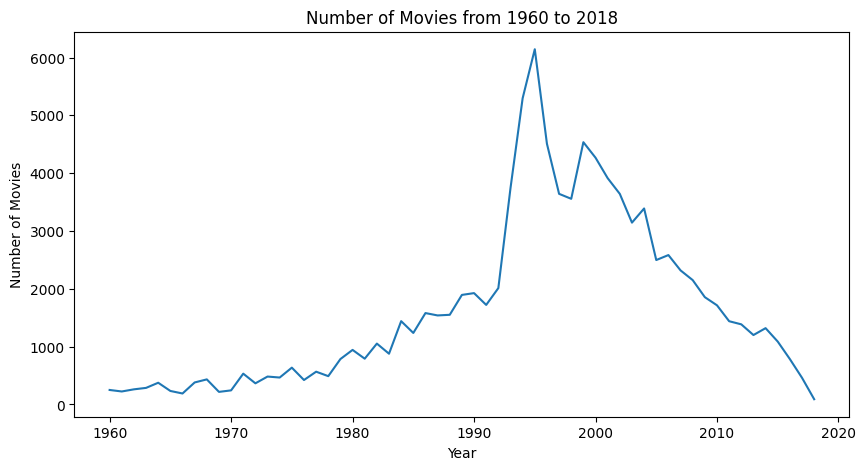

In [493]:
fig, ax = plt.subplots(figsize=(10,5))
x = year_counts.keys()
y = year_counts.values()
ax.plot(x, y)
ax.set_title("Number of Movies from 1960 to 2018")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")

# Data Exploration (`genres`)

In [411]:
# Counts of ratings per each genre
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(movies.loc[movies[genre] == 1])

genre_count

{'(no genres listed)': 47,
 'Action': 30635,
 'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Crime': 16681,
 'Documentary': 1219,
 'Drama': 41928,
 'Fantasy': 11834,
 'Film-Noir': 870,
 'Horror': 7291,
 'IMAX': 4145,
 'Musical': 4138,
 'Mystery': 7674,
 'Romance': 18124,
 'Sci-Fi': 17243,
 'Thriller': 26452,
 'War': 4859,
 'Western': 1930}

In [412]:
# 5 most reviewed movies
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:6]]
top_5_genres

['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance']

Text(0.5, 0.01, 'Rating')

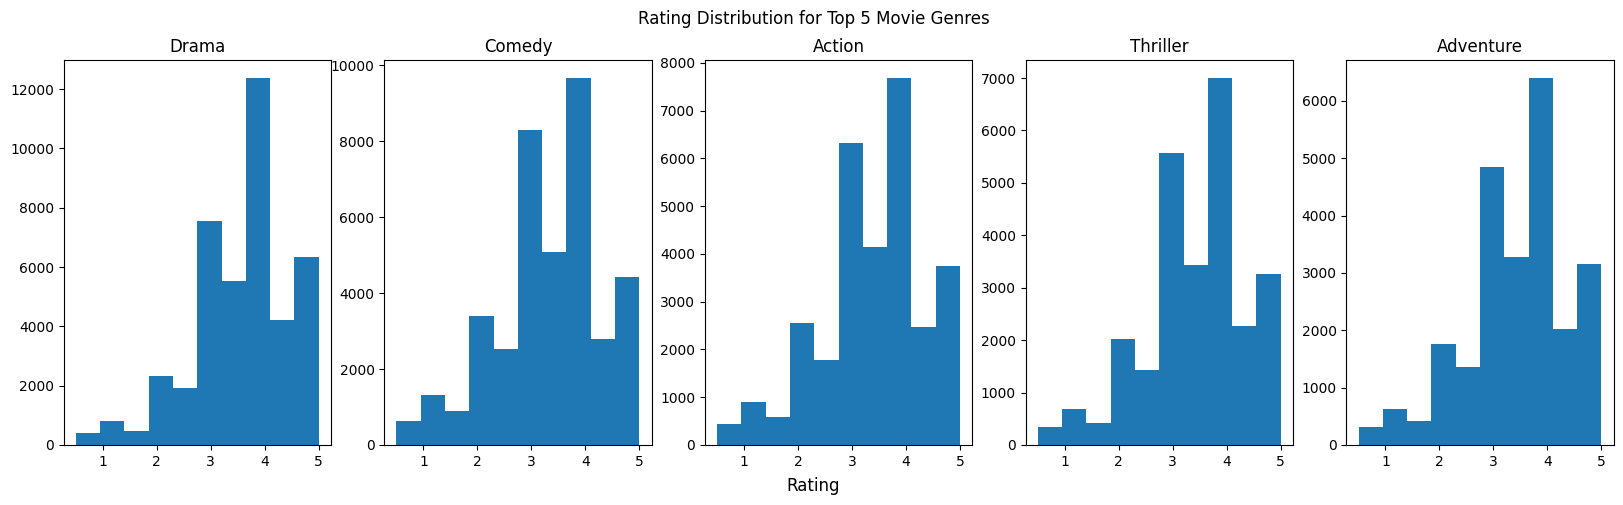

In [413]:
# Rating distribution of top 5 movie genres
fig, axes = plt.subplots(1,5, figsize=(20,5))

for i in range(5):
    genre = top_5_genres[i]
    axes[i].hist(movies.loc[movies[genre] == 1]['rating'])
    axes[i].set_title(genre)

fig.suptitle("Rating Distribution for Top 5 Movie Genres")
fig.supxlabel("Rating")


In [414]:
# Median ratings
for genre in genre_names:
    print(f"Median rating of {genre}: {movies.loc[movies[genre] == 1]['rating'].median()}")

Median rating of (no genres listed): 3.5
Median rating of Action: 3.5
Median rating of Adventure: 3.5
Median rating of Animation: 4.0
Median rating of Children: 3.5
Median rating of Comedy: 3.5
Median rating of Crime: 4.0
Median rating of Documentary: 4.0
Median rating of Drama: 4.0
Median rating of Fantasy: 3.5
Median rating of Film-Noir: 4.0
Median rating of Horror: 3.5
Median rating of IMAX: 4.0
Median rating of Musical: 3.5
Median rating of Mystery: 4.0
Median rating of Romance: 3.5
Median rating of Sci-Fi: 3.5
Median rating of Thriller: 3.5
Median rating of War: 4.0
Median rating of Western: 4.0


# Data Exploration (most rated movies)

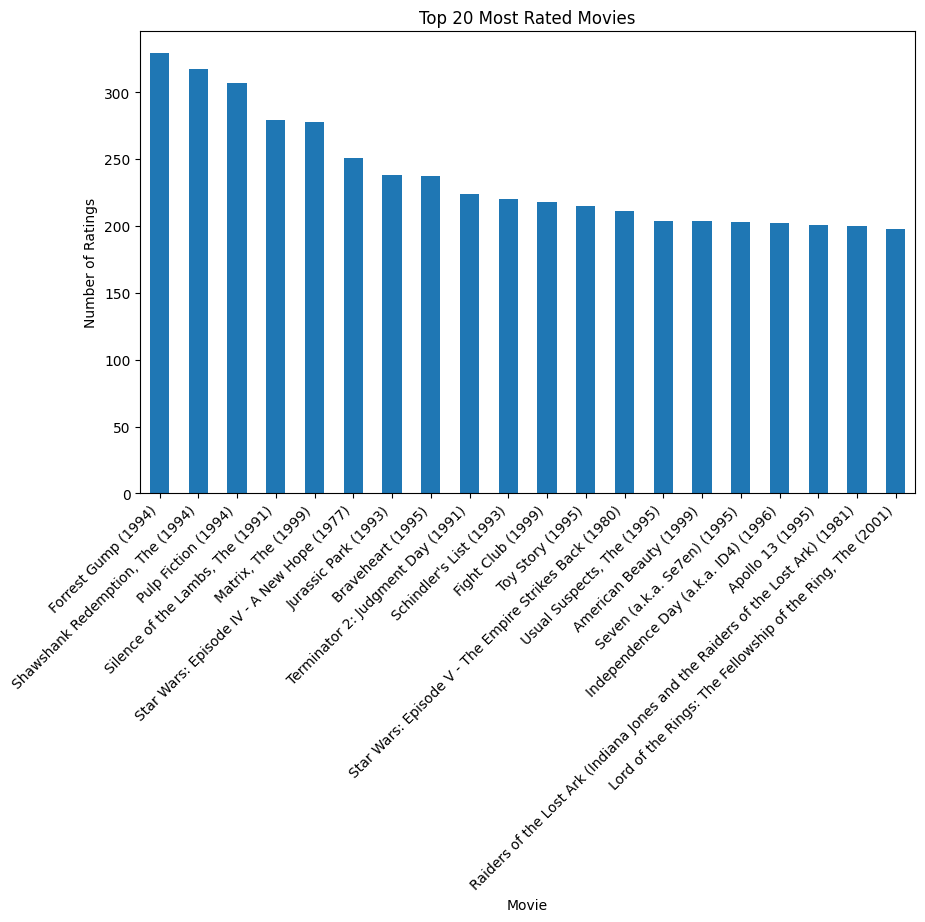

In [415]:
rating_counts = movies.groupby('title')['rating'].count()
plt.figure(figsize=(10, 6))
rating_counts.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.title('Top 20 Most Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data Exploration (`Groupby userId`)

In [ ]:
median_ratings = {}
for genre in genre_names:
    median_ratings[genre] = movies.loc[movies[genre] == 1].groupby('userId')['rating'].median()

median_ratings

In [443]:
# DF with median ratings per genre for all users
user_ratings_df = pd.DataFrame(median_ratings)

user_ratings_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,NaN,4.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,5.0,4.00,NaN,5.0,5.0,4.0,4.00,4.0,5.0,4.0
2,NaN,4.0,4.0,NaN,NaN,4.0,4.0,5.00,4.0,NaN,NaN,3.00,3.75,NaN,4.0,4.5,3.75,4.0,4.5,3.5
3,NaN,4.5,3.0,0.5,0.5,0.5,0.5,NaN,0.5,4.0,NaN,4.75,NaN,0.5,5.0,0.5,5.00,5.0,0.5,NaN
4,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0,4.5,4.00,3.00,4.0,4.0,3.5,2.50,4.0,4.0,4.0
5,NaN,3.0,3.0,4.5,4.0,3.0,4.0,NaN,4.0,4.0,NaN,3.00,3.00,5.0,4.0,3.0,2.50,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,3.5,3.5,4.0,3.5,4.0,4.0,4.00,4.0,3.5,4.0,3.50,3.00,4.0,4.0,4.0,3.50,3.5,4.0,3.5
607,NaN,4.0,3.0,3.0,3.0,3.0,4.0,NaN,4.0,3.0,NaN,4.00,5.00,3.0,5.0,3.0,3.00,4.0,5.0,4.0
608,NaN,3.5,3.5,3.5,2.5,3.0,4.0,3.25,3.5,3.0,4.0,3.50,4.00,3.0,3.5,3.0,3.50,3.5,4.0,3.0


# Try `surprise` Recommender System

This model only takes into account the movie ID and rating, not the genres.

In [444]:
import surprise
from surprise import Reader, Dataset, SVD

In [445]:
reader = Reader()

In [446]:
data = Dataset.load_from_df(movies[['userId', 'movieId', 'rating']], reader=reader)

In [447]:
train, test = surprise.model_selection.train_test_split(data, random_state=42)

In [448]:
svd = SVD()
# Other models that we can try are
# KNNBasic
# NMF

In [449]:
from surprise.model_selection import cross_validate

In [450]:
# cross_validate(svd, data, measures=['RMSE', 'MAE'])
svd.fit(train)

In [451]:
svd.test(test)

[Prediction(uid=217, iid=986, r_ui=4.0, est=2.923822433268148, details={'was_impossible': False}),
 Prediction(uid=184, iid=105653, r_ui=4.0, est=3.7221732893620842, details={'was_impossible': False}),
 Prediction(uid=263, iid=5617, r_ui=4.5, est=3.8165577580948136, details={'was_impossible': False}),
 Prediction(uid=414, iid=5425, r_ui=4.0, est=3.371584972397073, details={'was_impossible': False}),
 Prediction(uid=380, iid=7293, r_ui=3.0, est=3.9739408133256116, details={'was_impossible': False}),
 Prediction(uid=76, iid=2628, r_ui=2.0, est=3.1673869717848633, details={'was_impossible': False}),
 Prediction(uid=608, iid=2541, r_ui=3.0, est=3.535575770706627, details={'was_impossible': False}),
 Prediction(uid=79, iid=858, r_ui=5.0, est=4.845323231962399, details={'was_impossible': False}),
 Prediction(uid=290, iid=2391, r_ui=4.0, est=4.348691122534056, details={'was_impossible': False}),
 Prediction(uid=599, iid=6217, r_ui=1.5, est=2.5276607801896263, details={'was_impossible': False}

In [452]:
# Model evaluation
surprise.accuracy.rmse(svd.test(test))

RMSE: 0.8705


0.8705371405933461

### Predicing ratings for all movies from one user (example is user ID 610)

In [453]:
movie_id = list(movies['movieId'].value_counts().index)

In [454]:
# predicting how user 610 would rate movie id 1
svd.predict(610, 1)

Prediction(uid=610, iid=1, r_ui=None, est=4.390509977374815, details={'was_impossible': False})

In [455]:
# predicting how user 610 would rate all of the movies
predictions = {}
for movie in movie_id:
    predictions[movie] = svd.predict(610, movie)[3] #610 is the user ID

predictions
# potentially get top 5 movies

{356: 4.086834857124114,
 318: 4.481220120039087,
 296: 4.894729737408423,
 593: 4.748035774409925,
 2571: 4.269095663164615,
 260: 4.753516861425476,
 480: 4.227382378738529,
 110: 4.286624727531796,
 589: 4.595524787583615,
 527: 4.579695276481678,
 2959: 4.753307133658157,
 1: 4.390509977374815,
 1196: 4.592985940192112,
 50: 4.543412804457322,
 2858: 4.295471590012747,
 47: 4.315207849262571,
 780: 3.6846754947385194,
 150: 3.9628762152935058,
 1198: 4.59082452432479,
 4993: 4.617726938456301,
 1210: 4.408950778528099,
 858: 4.505252888652622,
 457: 4.189460620045723,
 592: 3.822998220514035,
 5952: 4.642452561523184,
 2028: 4.381040160152728,
 7153: 4.449292669192355,
 588: 4.016002654341154,
 608: 4.3469141714282244,
 2762: 4.459725263733477,
 380: 3.8351465036057313,
 32: 4.319436347911413,
 364: 4.034924590050897,
 1270: 4.3527274688840265,
 377: 4.120793661194447,
 3578: 4.2894695257343525,
 4306: 4.125042031610011,
 1580: 3.9541781793631046,
 590: 3.7407220287096834,
 648: 3.